# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов

---

In [1]:
# Bot check

# HW_ID: fpmi_ad3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

На занятии мы уже <a href="https://miptstats.github.io/courses/ad_fivt/titanik.html" target="_blank">начинали</a> работать с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных получить некоторое приближенное правило определения, выжил пассажир или нет.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [3]:
df = pd.read_csv('train.csv')
df.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [5]:
test_df = df.sample(frac=0.3)
train_df = df.drop(test_df.index)

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [6]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак

def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [7]:
test_features, test_target = get_features_and_target(test_df)
train_features, train_target = get_features_and_target(train_df)
merged_train = test_df[features_columns + [target_column]]

#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно. 

*Не забывайте про информативность и эстетичность графиков.*

In [8]:
print(train_features.head(5))

   Pclass     Sex   Age  SibSp  Parch     Fare
0       3    male  22.0      1      0   7.2500
1       1  female  38.0      1      0  71.2833
2       3  female  26.0      0      0   7.9250
3       1  female  35.0      1      0  53.1000
4       3    male  35.0      0      0   8.0500


Всего выжило

In [9]:
print("%.2f пассажиров" % (len(train_target[train_target == 1]) / len(train_target)))

0.40 пассажиров


Посмотрим на то, зависело ли спасение пассажира от его пола. Разбиение по полам будем использовать и для некоторых других параметров

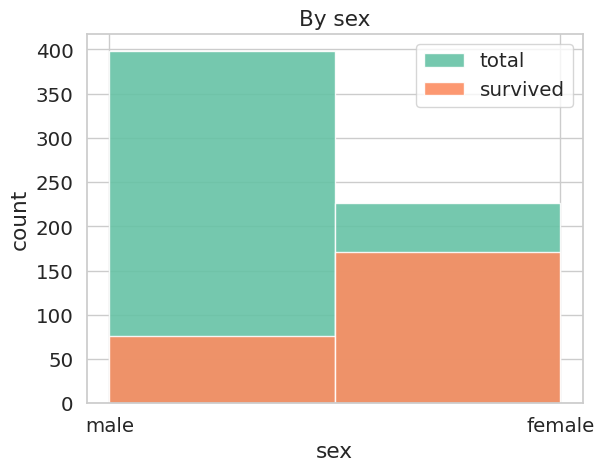

In [10]:
survived = train_features.loc[train_target[train_target == 1].index]
plt.hist(train_features['Sex'], label='total', alpha=0.9, bins=2)
plt.hist(survived['Sex'], label='survived', alpha=0.9, bins=2)
plt.ylabel('count')
plt.xlabel('sex')
plt.title('By sex')
plt.legend()

Как влиял класс билета пассажира:

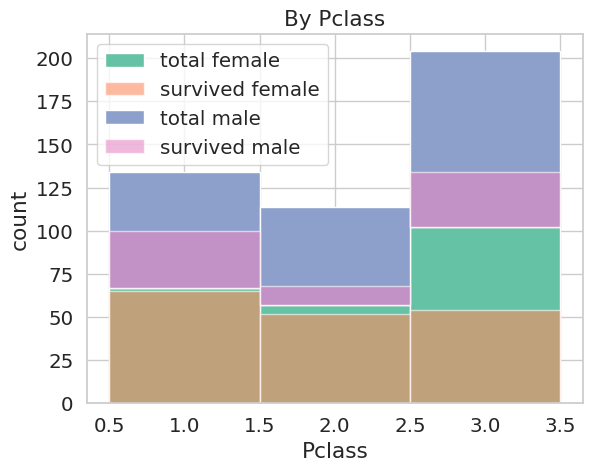

In [11]:
survived = train_features.loc[train_target[train_target == 1].index]
plt.hist(train_features[train_features.Sex == 'female']['Pclass'], bins=[0.5,1.5,2.5,3.5], label='total female', alpha=1)
plt.hist(survived[survived.Sex == 'female']['Pclass'], bins=[0.5,1.5,2.5,3.5], label='survived female', alpha=0.6)

plt.hist(train_features[train_features.Sex == 'female']['Pclass'], bins=[0.5,1.5,2.5,3.5], label='total male', alpha=1
         , bottom=train_features[train_features.Sex == 'female'].groupby(['Pclass']).count()['Sex'])
plt.hist(survived[survived.Sex == 'male']['Pclass'], bins=[0.5,1.5,2.5,3.5], label='survived male', alpha=0.6
         , bottom=train_features[train_features.Sex == 'female'].groupby(['Pclass']).count()['Sex'])
plt.ylabel('count')
plt.xlabel('Pclass')
plt.title('By Pclass')
plt.legend()
plt.show()

Плата неразрывно связано с классом билета, поэтому сама по себе вряд ли влияет

(0.0, 160.0)

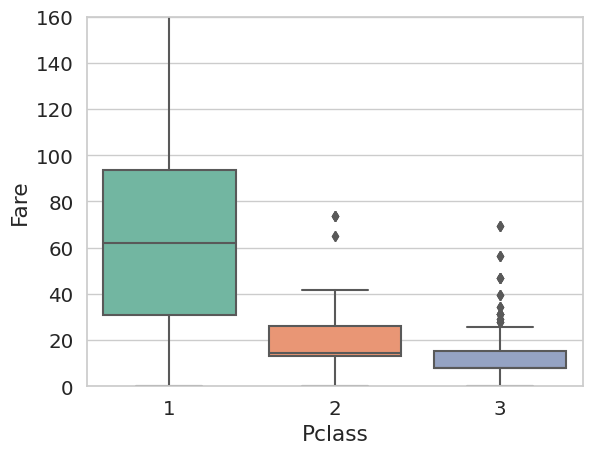

In [12]:
sns.boxplot(x="Pclass", y="Fare", data=train_features)
plt.ylim(0, 160)

Количество родственников (очень похожие распределения)

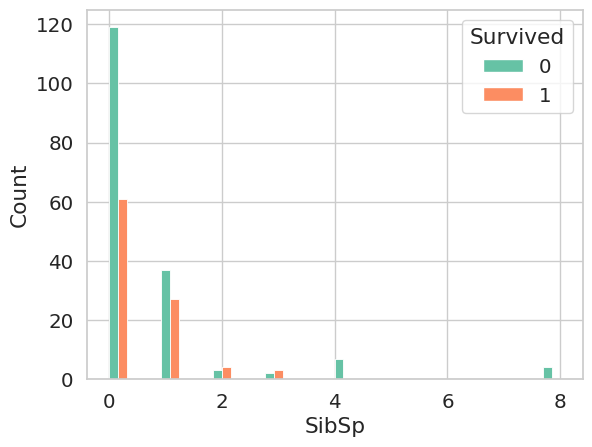

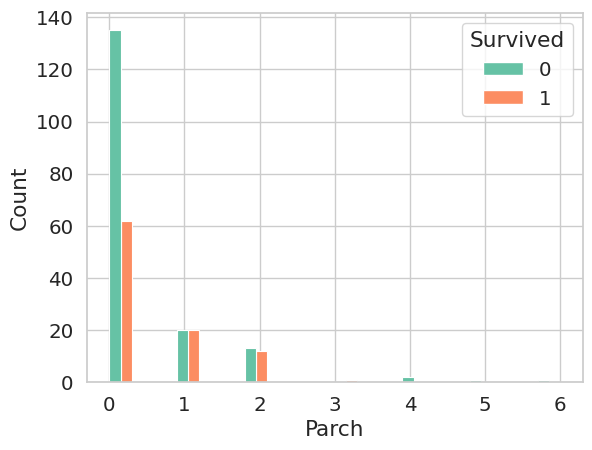

In [13]:
sns.histplot(x="SibSp", data=merged_train, hue='Survived', multiple='dodge', alpha=1)
plt.show()
sns.histplot(x="Parch", data=merged_train, hue='Survived', multiple='dodge', alpha=1)
plt.show()

Возрастное распределение выживших не предоставляет явных закономерностей и сильно разнится для различных тестовых выборок

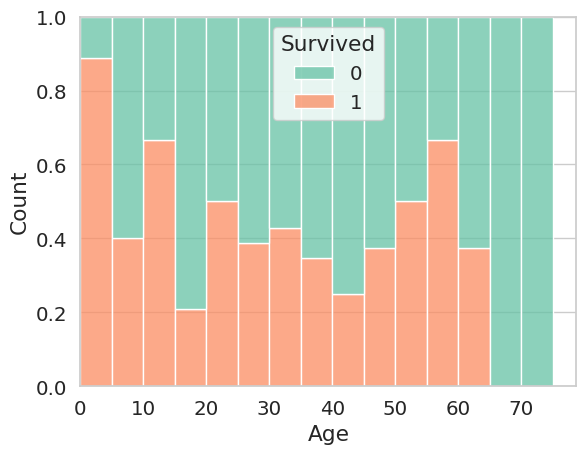

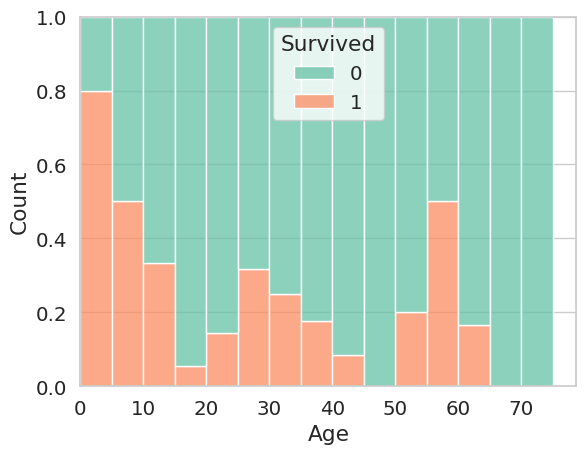

<Axes: xlabel='Age', ylabel='Count'>

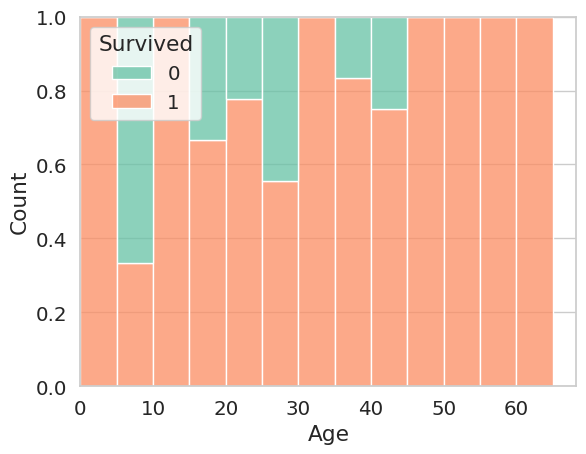

In [14]:
sns.histplot(x="Age", data=merged_train, hue='Survived', multiple='fill', bins=[i*5 for i in range(18)])
plt.show()
sns.histplot(x="Age", data=merged_train[merged_train.Sex == 'male'], hue='Survived', multiple='fill', bins=[i*5 for i in range(18)])
plt.show()
sns.histplot(x="Age", data=merged_train[merged_train.Sex == 'female'], hue='Survived', multiple='fill', bins=[i*5 for i in range(18)])

#### 3. Классификация

На основе проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**
см resolve1
...

**Дерево 2:**
см resolve2
...

Реализуйте полученные деревья по шаблону

Реализуем первое дерево

In [15]:
def resolve1(feature):
    if feature.Sex == 'female':
        if feature.Pclass == 1 or feature.Pclass == 2:
            return 1
        if 0 < feature.Parch + feature.SibSp < 4:
            return 1
        return 0
    else:
        if feature.Pclass != 1:
            return 0
        if feature.Parch + feature.SibSp == 0 or feature.Parch + feature.SibSp >= 4:
            return 0
        return 1

Реализация второго дерева

In [16]:
def resolve2(feature):
    if feature.Pclass == 1:
        return 1
    return feature.Sex == 'female'

In [17]:
def tree(features, resolve):
    predicted = []
    for index, row in features.iterrows():
        predicted.append(resolve(row))

    predicted = pd.Series(predicted)
    return predicted

#### 4. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

Выберем самый интуитивный вариант - процент 'угаданных' значений

Реализуйте данный критерий по шаблону

In [18]:
def criteria(target, predicted):
    target['Predicted'] = predicted
    target['Right'] = (target.Predicted == target.Survived)
    return 100 * len(target[target.Right == True]) / len(target)

Посчитайте качество полученных ранее деревьев.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [19]:
print('Resolve1: ', '%.2f' % criteria(test_target.reset_index().drop(columns='index'), tree(test_features, resolve1)), '%')
print('Resolve2: ', '%.2f' % criteria(test_target.reset_index().drop(columns='index'), tree(test_features, resolve2)), '%')

Resolve1:  80.90 %
Resolve2:  73.41 %


**5. Метод ближайшего соседа**

В домашнем задании 1 вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи. 

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

In [20]:
def find_nearest_points(A: np.ndarray, B: np.ndarray, k: int) -> np.ndarray:
    return np.argsort(np.sum((np.expand_dims(B, axis=-2) - A)**2, axis=-1), axis=-1)[:, :k]

def preprocess(data):
    data.fillna(data.mean())
    data['Sex'] = data['Sex'].apply(lambda x: int(x=='male'))
    return data

def knn(features, train_featuresl, train_targetl, k=1):
    train_featuresl = preprocess(train_featuresl).to_numpy()
    features = preprocess(features).to_numpy()

    nearest_k = find_nearest_points(train_featuresl, features, k)
    predicted = []
    for points in nearest_k:
        vals = train_targetl.loc[points, 'Survived'].to_list()
        predicted.append(int(vals.count(1) > vals.count(0)))
    return predicted

Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

/tmp/ipykernel_2747/3557564307.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = data['Sex'].apply(lambda x: int(x=='male'))
/tmp/ipykernel_2747/3557564307.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = data['Sex'].apply(lambda x: int(x=='male'))
/tmp/ipykernel_2747/3557564307.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

Text(0, 0.5, 'percent of right answers')

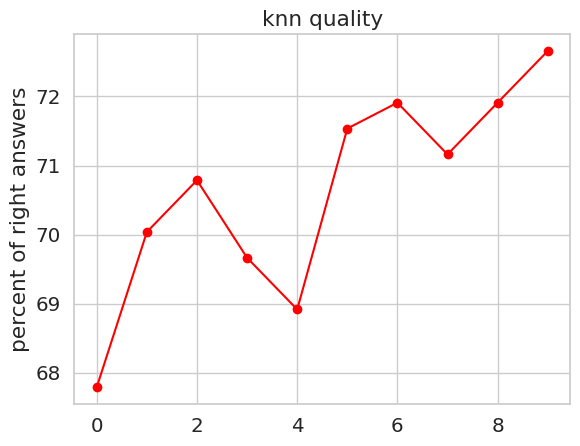

In [22]:
plt.plot([criteria(test_target.reset_index().drop(columns='index'), knn(
    test_features, train_features, train_target.reset_index().drop(columns='index'), k
)) for k in range(1, 11)], 'o-r', )
plt.title('knn quality')
plt.ylabel('percent of right answers')

#### 6. Выводы

В первую очередь хочется выделить закономерности самих данных: во время крушения в первую очередь спасали женщин и обладателей более престижных билетов. Также зачастую выжить помогали близкие родственники на борту.

Что касается методов классификации данных, то разрешающие деревья, основанные на проведенном анализе показывают очень неплохой результат в 80% правильных ответов. метод ближайших соседей колеблется от 68% до 75% для разных k и, как мне кажется, имеет возможность для улучшения - разная нормировка для разных параметров(осей).


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="yelp.com">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

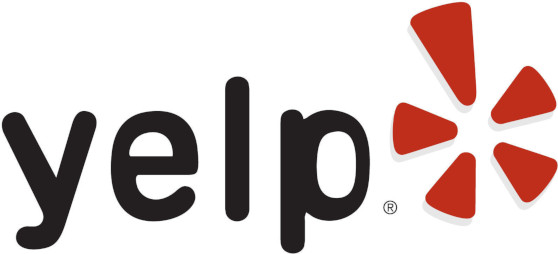

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [4]:
df = pd.read_csv('yelp_business.csv')
df.head(5)

Unnamed: 0             business_id                        name  \
0           0  FYWN1wneV18bWNgQjJ2GNg          "Dental by Design"   
1           1  He-G7vWjzVUysIKrfNbPUQ       "Stephen Szabo Salon"   
2           2  KQPW8lFf1y5BT2MxiSZ3QA     "Western Motor Vehicle"   
3           3  8DShNS-LuFqpEWIp0HxijA          "Sports Authority"   
4           4  PfOCPjBrlQAnz__NXj9h_w  "Brick House Tavern + Tap"   

  neighborhood                           address            city state  \
0          NaN        "4855 E Warner Rd, Ste B9"       Ahwatukee    AZ   
1          NaN              "3101 Washington Rd"        McMurray    PA   
2          NaN          "6025 N 27th Ave, Ste 1"         Phoenix    AZ   
3          NaN  "5000 Arizona Mills Cr, Ste 435"           Tempe    AZ   
4          NaN                    "581 Howe Ave"  Cuyahoga Falls    OH   

  postal_code   latitude   longitude  is_open  \
0       85044  33.330690 -111.978599        1   
1       15317  40.291685  -80.104900        1   
2       85017  33.524903 -112.115310        1   
3       85282  33.383147 -111.964725        0   
4       44221  41.119535  -81.475690        1   

                                          categories  
0  Dentists;General Dentistry;Health & Medical;Or...  
1  Hair Stylists;Hair Salons;Men's Hair Salons;Bl...  
2  Departments of Motor Vehicles;Public Services ...  
3                            Sporting Goods;Shopping  
4  American (New);Nightlife;Bars;Sandwiches;Ameri...

Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [5]:
df.groupby(['city'])['business_id'].count().reset_index().rename(columns={'business_id': 'count'}).sort_values(
            by=['count'], ascending=False).reset_index().drop(['index'], axis='columns').head(5)

city  count
0   Las Vegas  26775
1     Phoenix  17213
2     Toronto  17206
3   Charlotte   8553
4  Scottsdale   8228

Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

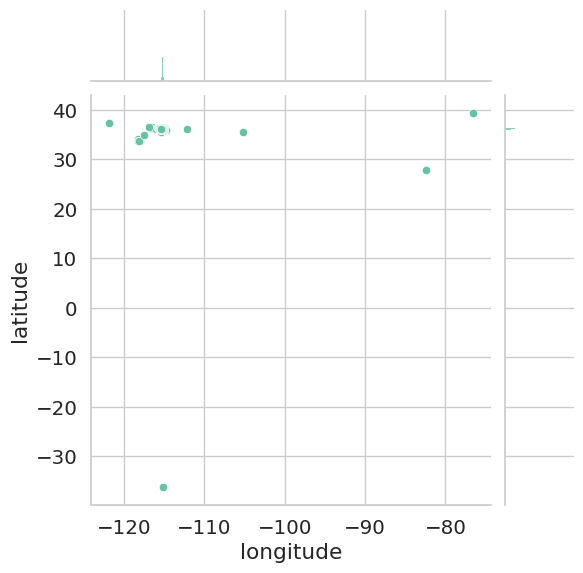

In [6]:
lv = df[df.city == 'Las Vegas']
sns.jointplot(data=lv, x='longitude', y='latitude')

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. На этом графике должны выделяться некоторые улицы. 

(36.0, 36.3)

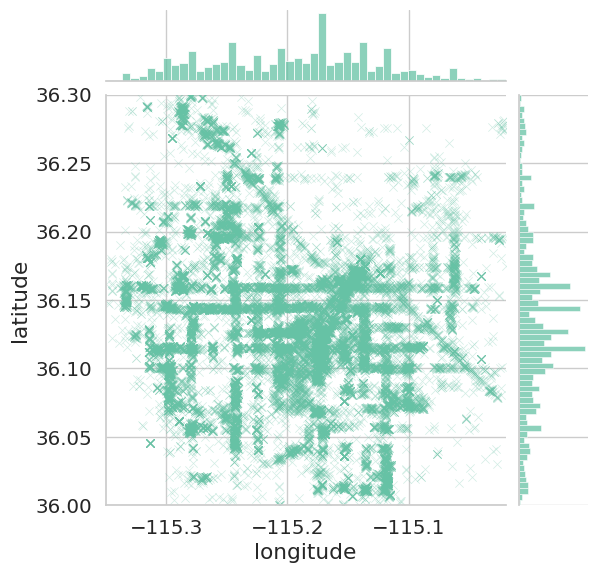

In [7]:
lv = lv[(lv.longitude <= -115.02) & (lv.latitude <= 36.3)]
lv = lv[(-115.35 <= lv.longitude) & (36 <= lv.latitude)]
sns.jointplot(data=lv, x='longitude', y='latitude', marker='x', alpha=0.3)
plt.xlim(-115.35, -115.02)
plt.ylim(36, 36.3)

Разберитесь с тем, как подгрузить интерактивную карту города в качестве фона графика. Можно пойти двумя следующими способами.
1. Изучить <a href="https://miptstats.github.io/courses/python/11_plotly.html" target="_blank">материалы</a> по библиотеке <a href="https://plotly.com/python/" target="_blank"><b>Plotly</b></a>. Возможно, потребуется также заглянуть в документацию.
1. Поразбираться с библиотекой <a href="https://github.com/python-visualization/folium" target="_blank"><b>Folium</b></a>. Посмотрите множество <a href="https://nbviewer.org/github/python-visualization/folium/tree/main/examples/" target="_blank">примеров</a>, может также помочь <a href="https://proglib.io/p/python-web-map" target="_blank">статья на русском</a>.

*Внимание!* Интерактивная карта может не сохраниться в ноутбуке, а если сохранится, то вес ноутбука может превзойти 20 Мб. Рекомендуется сохранить карту в html и отправить ее отдельным файлом в бот.

In [16]:
import plotly
import plotly.graph_objects as go
import plotly.express as px

fig = px.scatter_mapbox(
    lv,
    title='Companies in Las Vegas',
    lat='latitude', lon='longitude',
    height=500, zoom=10,
    mapbox_style='open-street-map',
    labels='companies',
)
fig.update_layout(margin={"r": 0,"t":0,"l":0,"b":0}, showlegend=True)
fig.write_html("a.html")
fig.show()

Если все получилось, вы молодцы! Далее в этой задаче тоже можно делать интерактивные карты.

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [9]:
df_rev = pd.read_csv('yelp_review.csv')
print(df_rev.head(5))

   Unnamed: 0             business_id  stars
0           0  AEx2SYEUJmTxVVB18LlCwA      5
1           1  VR6GpWIda3SfvPC-lg9H3w      5
2           2  CKC0-MOWMqoeWf6s-szl8g      5
3           3  ACFtxLv8pGrrxMm6EgjreA      4
4           4  s2I_Ni76bjJNK9yG60iD-Q      4


В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [10]:
df_rev = df_rev.loc[(df_rev['business_id'].isin(lv['business_id']))].reset_index().drop(columns=['index', 'Unnamed: 0'])
print(df_rev.head(5))

              business_id  stars
0  8QWPlVQ6D-OExqXoaD2Z1g      5
1  pLZ9oZM8c6MNbRlg06lBPg      1
2  6Q7-wkCPc1KF75jZLOTcMw      2
3  9Jc3W0aR9Xf2gcHI0rEXsw      1
4  xVEtGucSRLk5pxxN0t4i6g      5


Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [11]:
pc = df_rev.groupby(by='business_id').aggregate([np.mean, np.size])
print(pc.head(5))

                           stars      
                            mean  size
business_id                           
--9e1ONYQuAa-CB_Rrw7Tw  4.088904  1451
--DdmeR16TRb3LsjG0ejrQ  3.200000     5
--WsruI0IGEoeRmkErU5Gg  4.928571    14
--Y7NhBKzLTbNliMUX_wfg  4.875000     8
--e8PjCNhEz32pprnPhCwQ  3.473684    19


Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [12]:
pc.columns = ['review', 'count']
print(pc.head(5))

                          review  count
business_id                            
--9e1ONYQuAa-CB_Rrw7Tw  4.088904   1451
--DdmeR16TRb3LsjG0ejrQ  3.200000      5
--WsruI0IGEoeRmkErU5Gg  4.928571     14
--Y7NhBKzLTbNliMUX_wfg  4.875000      8
--e8PjCNhEz32pprnPhCwQ  3.473684     19


Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [13]:
lv = lv.join(pc, on='business_id')

Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

In [15]:
fig = px.density_mapbox(
    lv,
    title='Companies in Las Vegas',
    lat='latitude', lon='longitude',
    z='review',
    radius=3,
    height=500, zoom=10,
    mapbox_style='open-street-map',
    labels='companies',
)
fig.update_layout(margin={"r": 0,"t":0,"l":0,"b":0}, showlegend=True)
fig.write_html("b.html")
fig.show()

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [21]:
lv['latitude'] = lv['latitude'].apply(lambda x: np.round(x*4, decimals=1)*0.25)
lv['longitude'] = lv['longitude'].apply(lambda x: np.round(x*4, decimals=1)*0.25)

Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

<Axes: xlabel='longitude', ylabel='latitude'>

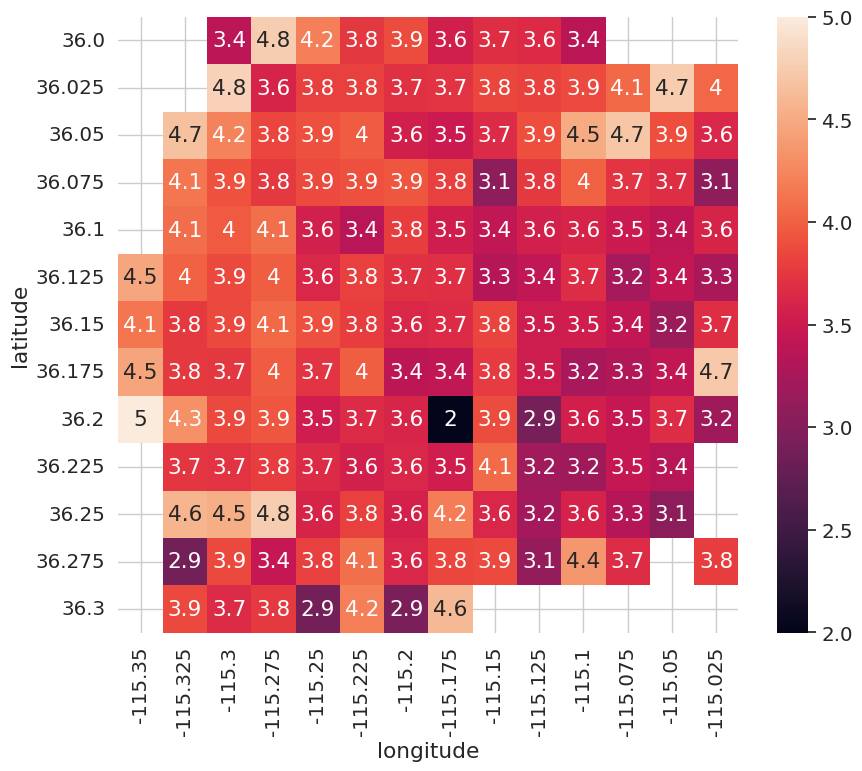

In [33]:
pivot = pd.pivot_table(lv, values='review', index=['latitude'], columns=['longitude'], aggfunc=np.mean)
plt.figure(figsize=(10, 8))
sns.heatmap(pivot, annot=True)

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** Цветовая палитра может не давать наглядную картину происходящего. Недостаточность данных может создавать очень хорошего/плохого района из-за маленького числа компаний и с только хорошими/плохими отзывами

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

<Axes: xlabel='longitude', ylabel='latitude'>

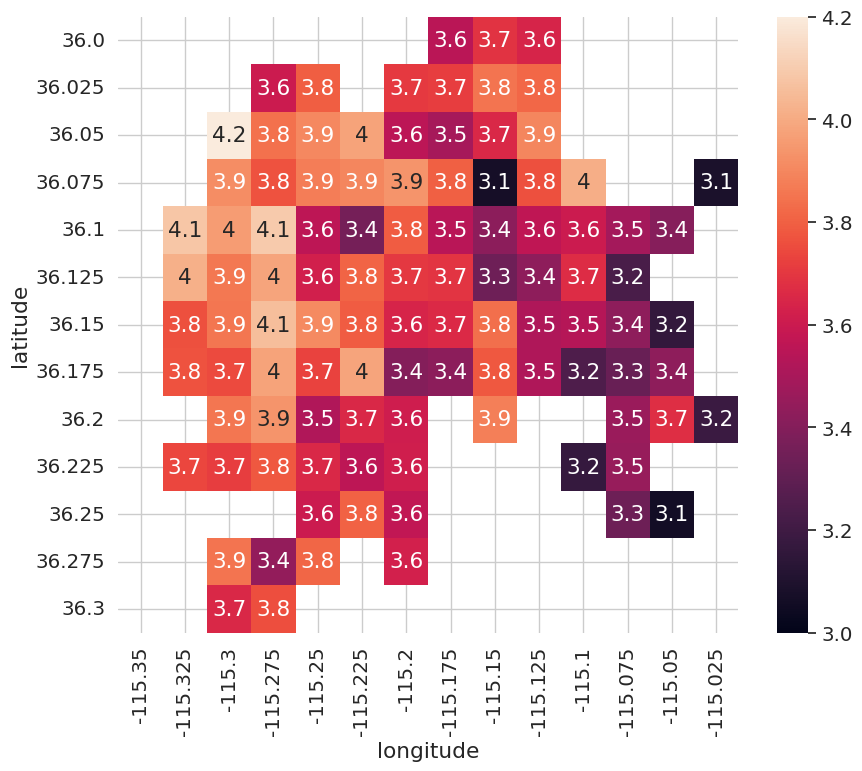

In [41]:
pivot = pd.pivot_table(lv, values='review', index=['latitude'], columns=['longitude'], aggfunc=(np.mean, 'count') )
plt.figure(figsize=(10, 8))
sns.heatmap(pivot[pivot['count'] >= 30]['mean'], annot=True, vmin=3, vmax=4.2)

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** Оценки стали более приближенными к среднему значению, нет выдающихся, чего и следовало ожидать

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [ ]:
...

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** <...>

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [ ]:
...

Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [ ]:
...

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** <...>